Objective:

Statistical analysis of business data. Explore the dataset and extract insights from the data. The idea is for you to get comfortable with doing statistical analysis in Python.

You are expected to perform the statistical analysis to answer the following questions:

1. Explore the dataset and extract insights using Exploratory Data Analysis.
2. Do the users spend more time on the new landing page than the old landing page?
3. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
4. Does the converted status depend on the preferred language? [Hint: Create a contingency table using the pandas.crosstab() function]
5. Is the mean time spent on the new page same for the different language users?

Data Dictionary:

1. user_id - This represents the user ID of the person visiting the website.
2. group - This represents whether the user belongs to the first group (control) or the second group (treatment).
3. landing_page - This represents whether the landing page is new or old.
4. time_spent_on_the_page - This represents the time (in minutes) spent by the user on the landing page.
5. converted - This represents whether the user gets converted to a subscriber of the news portal or not.
6. language_preferred - This represents the language chosen by the user to view the landing page.

In [270]:
#imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [271]:
#loading the dataset using pandas
data = pd.read_csv("C:\\DataScience\\Fisayo\\abtest.csv") #to be edited based on current data folder

1. Explore the dataset and extract insights using Exploratory Data Analysis.

In [272]:
#To check the data type
data.dtypes

user_id                     int64
group                      object
landing_page               object
time_spent_on_the_page    float64
converted                  object
language_preferred         object
dtype: object

In [273]:
#to check the data shape
data.shape

(100, 6)

In [274]:
#To check for missing values
data.count()

user_id                   100
group                     100
landing_page              100
time_spent_on_the_page    100
converted                 100
language_preferred        100
dtype: int64

In [275]:
#To ensure all value counts adds up to the total (100)
data["language_preferred"].value_counts()

Spanish    34
French     34
English    32
Name: language_preferred, dtype: int64

There are no missing values

In [276]:
#To check for null values
data.apply(lambda x: sum(x.isnull()),axis=0)

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

In [277]:
#To check for data statistics of the relevant numerical variable (time spent)
data["time_spent_on_the_page"].describe()

count    100.000000
mean       5.377800
std        2.378166
min        0.190000
25%        3.880000
50%        5.415000
75%        7.022500
max       10.710000
Name: time_spent_on_the_page, dtype: float64

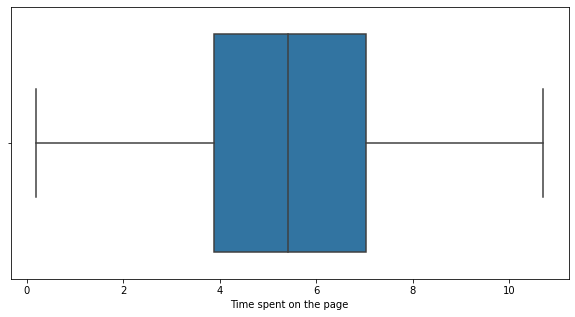

In [278]:
#To make a visual statistical summary for time_spent_on_the_page using boxplot.
plt.figure(figsize = (10,5))
sns.boxplot(x= data['time_spent_on_the_page'])
plt.xlabel("Time spent on the page")
plt.show()


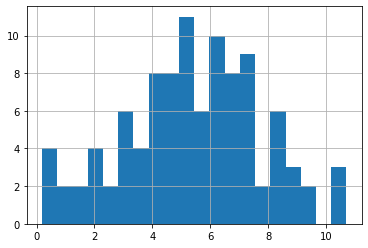

In [279]:
#To check the distribution and detect outliers.
data["time_spent_on_the_page"].hist(bins=20)
plt.show()

The time_spent_on_the_page distribution seems fairly normal

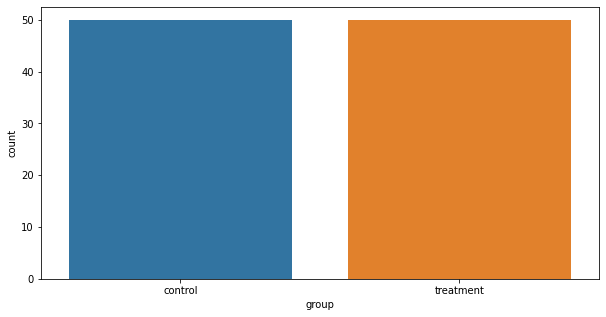

In [281]:
#To verify the groups and the distribution.
plt.figure(figsize = (10,5))
sns.countplot(x=data.group)
plt.show()

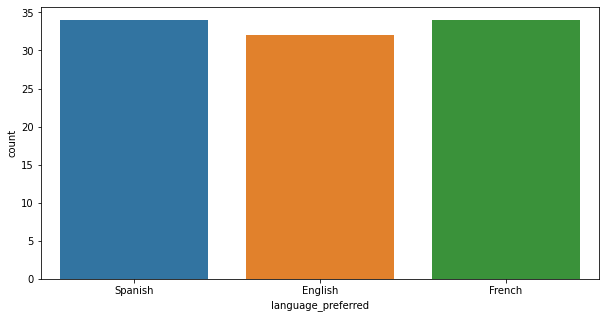

In [282]:
#To verify the languages and their distribution.
plt.figure(figsize = (10,5))
sns.countplot(x=data.language_preferred)
plt.show()

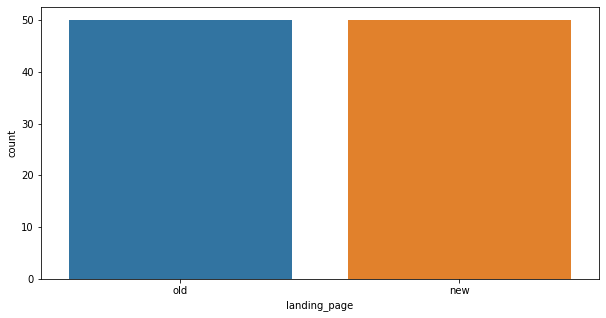

In [283]:
#To verify the landing pages and their distribution.
plt.figure(figsize = (10,5))
sns.countplot(x= data.landing_page)
plt.show()

From the Exploratory Data Analysis, the average time spent on the we site is 5.377800 with a standard deviation of 2.38 and an Interquartile range of 3.2. The data is also in good shape and does not require transformation.

-------------------------------------------------------------------------------

2. Do the users spend more time on the new landing page than the old landing page?

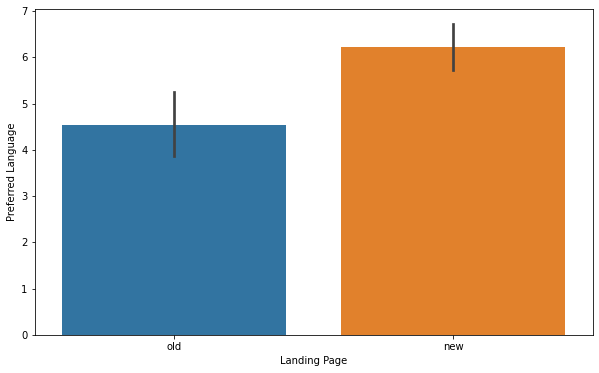

In [284]:
#Checking the time spent on each landing page
plt.figure(figsize = (10,6))
sns.barplot( x= "landing_page",y="time_spent_on_the_page",data=data)
plt.xlabel("Landing Page")
plt.ylabel("Preferred Language")
plt.show()

As seen from the above plot, the users spends more time on the new landing page than they do on the old landing page

-------------------------------------------------------------------------------

3. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

In [285]:
#To split the A/B test data into two. The old landing page and the ne landing page
old_page = data[data["landing_page"]=="old"]
new_page = data[data["landing_page"]=="new"]


In [286]:
#To count how many many conversions were recorded from each landing page
converted_old_page = old_page[old_page["converted"]=="yes"].count(axis = 0)["converted"]
converted_new_page = new_page[new_page["converted"]=="yes"].count(axis = 0)["converted"]


In [287]:
'''To calculate the conversion rate with respect to the number of users who visited each page.
Then represent the conversion rate in percentage(%)'''

conversion_rate_old= (converted_old_page/50)*100
conversion_rate_new= (converted_new_page/50)*100

#creating a dataframe to combine both conversion rates for easy tabulation
conversion_rate_data = pd.DataFrame({"Page":["old page","new page"],
                    "Conversion Rate (%)":[conversion_rate_old,conversion_rate_new]})

In [288]:
#visualize the table
conversion_rate_data


,Page,Conversion Rate (%)
0,old page,42.0
1,new page,66.0


From the Table above, it is seen that the conversion rate for the new page is greater than the conversion rate recorded for the old page

-------------------------------------------------------------------------------

4. Does the converted status depend on the preferred language? [Hint: Create a contingency table using the pandas.crosstab() function]

In [289]:
#using the crosstab() function to create the contigency table.
contigency = pd.crosstab(data["language_preferred"],data["converted"])

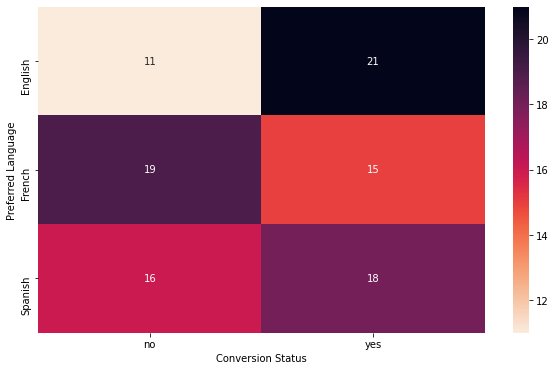

In [290]:
#using a heatmap to visualize the output the of the contigency table
plt.figure(figsize = (10,6))
sns.heatmap(contigency, cmap="rocket_r", annot = True)
plt.xlabel("Conversion Status")
plt.ylabel("Preferred Language")
plt.show()

As seen from the heat map above, the conversion status quite strongly depends on the language used, with English having the highest conversion status and lower non-conversion status. It is safe to conclude that, English appears to be the most preferred language while French is the least preferred.

In [292]:
#To view the tabulated result
contigency

converted,no,yes
language_preferred,,
English,11,21
French,19,15
Spanish,16,18


-------------------------------------------------------------------------------

5. Is the mean time spent on the new page same for the different language users?

In [293]:
#Using crosstab() to find the mean time spent on the landing pages
mean_time = pd.crosstab(data["language_preferred"],data["landing_page"],
                   values=data["time_spent_on_the_page"],
                   aggfunc = np.mean)

In [294]:
#To view the table for the mean time spent on the new landing page by the different language users
mean_time[["new"]]

landing_page,new
language_preferred,
English,6.663750
French,6.196471
Spanish,5.835294


From the above table, it is clear that the mean time spent on the new landing page is not the same for the different language users.

------------------------------------------------------------------------------